In [7]:
import transformers as t
import datasets
from datasets import load_dataset
from datasets import Dataset

from huggingface_hub import HfApi, HfFolder

import torch
import torch_geometric
from torch_geometric.data import Data

import numpy as np
import pandas as pd

import spacy

from sklearn.preprocessing import LabelEncoder

import matplotlib.pyplot as plt
import seaborn as sns
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

In [2]:
q_train = load_dataset("maastrichtlawtech/bsard", data_files="questions_fr_train.csv", split="train").to_pandas()
q_test = load_dataset("maastrichtlawtech/bsard", data_files="questions_fr_test.csv", split="train").to_pandas()
articles = load_dataset("maastrichtlawtech/bsard", data_files="articles_fr.csv", split="train").to_pandas()

Found cached dataset csv (C:/Users/Frank/.cache/huggingface/datasets/maastrichtlawtech___csv/maastrichtlawtech--bsard-d4b4993551724e5a/0.0.0/6954658bab30a358235fa864b05cf819af0e179325c740e4bc853bcc7ec513e1)
Found cached dataset csv (C:/Users/Frank/.cache/huggingface/datasets/maastrichtlawtech___csv/maastrichtlawtech--bsard-41a15be090989dc9/0.0.0/6954658bab30a358235fa864b05cf819af0e179325c740e4bc853bcc7ec513e1)
Found cached dataset csv (C:/Users/Frank/.cache/huggingface/datasets/maastrichtlawtech___csv/maastrichtlawtech--bsard-1ac8feb008d877a3/0.0.0/6954658bab30a358235fa864b05cf819af0e179325c740e4bc853bcc7ec513e1)


Dataframe shape: (22633, 12)

Dataframe info:
<bound method DataFrame.info of           id                                          reference   
0          1  Art. 1.1.1, Code Bruxellois de l'Air, du Clima...  \
1          2  Art. 1.1.2, Code Bruxellois de l'Air, du Clima...   
2          3  Art. 1.2.1, Code Bruxellois de l'Air, du Clima...   
3          4  Art. 1.3.1, Code Bruxellois de l'Air, du Clima...   
4          5  Art. 1.4.1, Code Bruxellois de l'Air, du Clima...   
...      ...                                                ...   
22628  22629              Art. 194, La Constitution (Titre VII)   
22629  22630             Art. 195, La Constitution (Titre VIII)   
22630  22631             Art. 196, La Constitution (Titre VIII)   
22631  22632             Art. 197, La Constitution (Titre VIII)   
22632  22633             Art. 198, La Constitution (Titre VIII)   

                                                 article  law_type   
0      Le présent Code règle une matière visée 

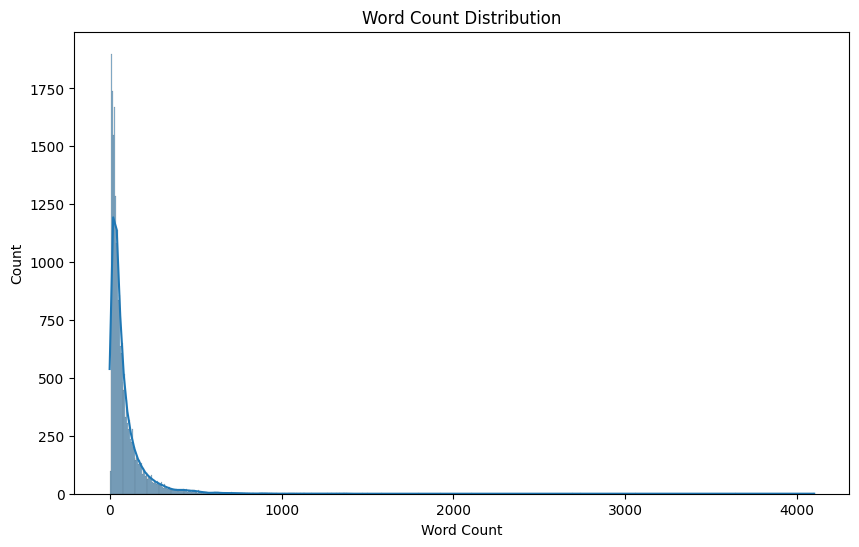

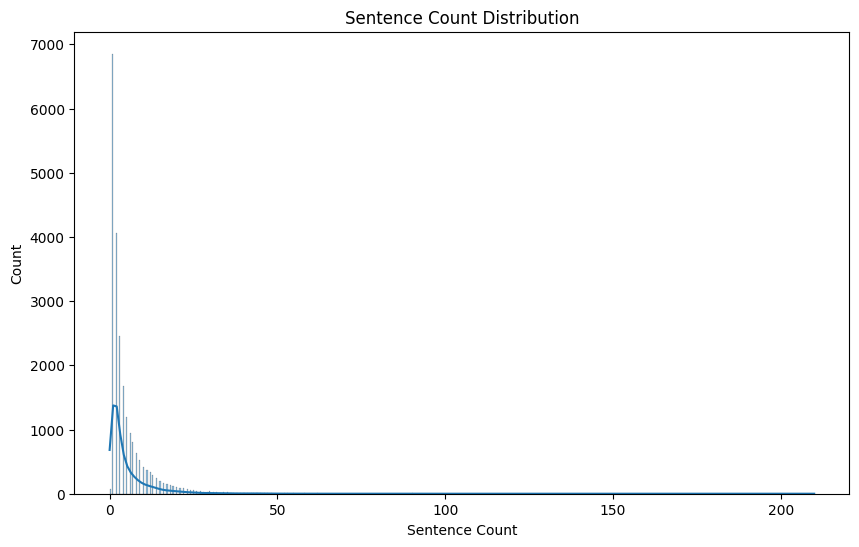

In [4]:
""" # Step 2: Load your data into a DataFrame
# Assuming your data is already in a DataFrame called 'df'

# Step 3: Basic statistics and information
print("Dataframe shape:", articles.shape)
print("\nDataframe info:")
print(articles.info)

# Step 4: Text preprocessing
def preprocess_text(text):
    # Remove special characters, numbers and punctuations
    text = re.sub('[^a-zA-Z]', ' ', text)
    
    # Convert to lowercase
    text = text.lower()
    
    # Tokenize
    words = nltk.word_tokenize(text)
    
    # Remove stopwords
    words = [word for word in words if word not in set(stopwords.words('french'))]
    
    # Lemmatize
    lemmatizer = WordNetLemmatizer()
    words = [lemmatizer.lemmatize(word) for word in words]
    
    # Reconstruct the sentence
    text = ' '.join(words)
    return text

articles['preprocessed_article'] = articles['article'].apply(preprocess_text)

# Step 5: Feature engineering
articles['word_count'] = articles['preprocessed_article'].apply(lambda x: len(x.split()))
articles['sentence_count'] = articles['article'].apply(lambda x: len(re.findall("\.", x)))

# Step 6: Data visualization
# Histogram of word counts
plt.figure(figsize=(10, 6))
sns.histplot(articles['word_count'], kde=True)
plt.title("Word Count Distribution")
plt.xlabel("Word Count")
plt.show()

# Histogram of sentence counts
plt.figure(figsize=(10, 6))
sns.histplot(articles['sentence_count'], kde=True)
plt.title("Sentence Count Distribution")
plt.xlabel("Sentence Count")
plt.show() """

In [22]:
articles[articles["sentence_count"] > 10]["article"][12]

"§ 1er. Bruxelles Environnementsoumet à une enquête publique le projet de plan et le rapport sur les incidences environnementales s'y rapportant.L'enquête publique est annoncée par voie d'affiches dans chacune des communes de la Région, par avis inséré au Moniteur belge et dans au moins trois journaux de langue française et trois journaux de langue néerlandaise diffusés dans la Région, ainsi que par un communiqué diffusé par voie radiophonique et télévisée. L'annonce précise les dates du début et de la fin de l'enquête publique. Outre les mesures d'annonce précitées, l'enquête publique est également annoncée sur le site de Bruxelles Environnement.§ 2. Après que ces annonces ont été faites, le projet de plan et le rapport sur les incidences environnementales sont déposés pendant un minimum de soixante jours, aux fins de consultation par le public, à la maison communale de chacune des communes de la Région ainsi que sur le site internet des communes. La moitié au moins du délai de soixan

In [14]:
articles["article"][4]

'Le plan régional Air-Climat-énergie, ci-après dénommé " le plan ", fixe les lignes directrices ainsi que les mesures à prendre afin d\'atteindre au moins les objectifs fixés par le présent Code, conformément à la politique de l\'Union européenne et au droit international en matière d\'air, de climat et d\'énergie.Il est composé des parties suivantes :1° une partie relative à l\'état des lieux en Région de Bruxelles-Capitale;2° une partie relative aux objectifs à atteindre sur une période de dix ans et aux objectifs indicatifs à long terme;3° une partie relative aux mesures à mettre à oeuvre sur une période de cinq ans pour atteindre ces objectifs.Les informations minimales contenues dans le plan figurent à l\'annexe 1.1.'